<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EB%B0%91%EB%94%A53%20%EC%8A%A4%ED%84%B0%EB%94%94/2.%EC%9E%90%EC%97%B0%EC%8A%A4%EB%9F%AC%EC%9A%B4%20%EC%BD%94%EB%93%9C%EB%A1%9C/%EB%B0%91%EB%B0%94%EB%8B%A5_%EB%94%A5%EB%9F%AC%EB%8B%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Variable 클래스 구현

- 데이터를 인스턴스 변수에 넣어서 접근성을 높이자

In [1]:
class Variable:
    def __init__(self, data):
        self.data = data
 
# Variable.data로 해당 데이터에 접근할 수 있습니다.

In [2]:
import numpy as np

data = np.array(1.0)
x = Variable(data)
print(x.data) # 인스턴스 변수여서 가능

#Variable.data

1.0


- 머신러닝 시스템은 많은 데이터를 쉽게 다루기 위해 기본 데이터 구조로 다차원 배열을 사용합니다.


다차원 배열은 숫자 등의 원소가 일정하게 모여있는 데이터 구조이며 원소의 순서에는 방향이 있습니다.


이 방향을 차원(dimension) 혹은 축(axis = 0 raw, axis =1 column) 이라고 합니다.

In [3]:
x = np.array(1)
print(x.ndim) # 0차원

x = np.array([1, 2, 3])
print(x.ndim) # 대괄호의 갯수로 차원을 알 수 있다!

0
1


### 다차원 배열을 사용하는 이유!

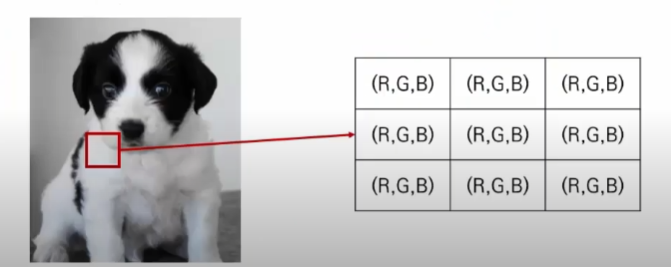

이미지 
출처: 나동빈님의 파이썬 이미지 처리 강의: https://www.youtube.com/watch?v=hqqmIemBbvw&list=PLRx0vPvlEmdBx9X5xSgcEk4CEbzEiws8C&index=2

딥러닝 분야에서 이미지 처리를 하기 위해서는 이미지를 행렬로 표현할 필요가 있습니다.

픽셀의 x, y 좌표 값이랑 (rgb) 값을 행렬 형태로 표현하여 처리합니다.

## 2.Function 클래스 구현

Function 클래스에서 주의할 점

- Variable 인스턴스를 받아 Variable 인스턴스를 출력합니다.
  - 입출력 형태를 통일하여 다른 곳에서 사용하기 간편하게 하는 것

- 출력하는 Variable 인스턴스의 실제 데이터는 인스턴스 변수인 data에 있습니다.
   - 데이터 접근하는 방식 통일

In [4]:
class Function:
    def __call__(self, input): # variable
        x = input.data # 인자로 받은 variable 인스턴스의 데이터를 x 변수에 넣고
        y = x**2 # 해당 데이터를 제곱하는 연산을 실행
        output = Variable(y) # 입출력 형태 통일
        return output

In [5]:
x = Variable(np.array(10))
f = Function()
y = f(x)

print(type(y))
print(y.data)
# 해당 함수는 입력값의 제곱으로 고정된 함수, 기반 클래스로는 안 어울림!

<class '__main__.Variable'>
100


- Function 클래스는 기반 클래스(부모 클래스)로서 모든 함수의 공통되는 기능을 구현합니다. (overriding)

- 구체적인 함수는 Function 클래스를 상속한 클래스에서 구현합니다.

이를 위해 클래스를 수정합니다.


In [6]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x) # 해당 클래스를 상속받은 클래스에서 실제 연산이 이루어진다
        output = Variable(y)
        return output
    
    def forward(self, x):
        raise NotImplementedError() # 상속받아 기능을 구현했을 때만 실행하도록 설정

In [7]:
class Square(Function): # 기반 클래스(__call__)를 상속받음!
    
    def forward(self, x): # 기반 클래스의 forward를 해당 클래스에 맞게 구체화 시킴
        return x ** 2

In [8]:
x = Variable(np.array(10))
f = Square()
y = f(x)
print(type(y))
print(y.data)


<class '__main__.Variable'>
100


## 3.Exp 함수 구현

y = $e^x$ 와 같은 연산을 할 수 있는 함수 클래스를 구현!

- 시그모이드같은 활성화 함수를 구현하기 위해서 필요



In [9]:
class Exp(Function):

    def forward(self, x):
        return np.exp(x)

# Function의 __call__ 메소드가 출력을 Varialbe인스턴스로 변경시켜주므로 바로 다른 함수에 대입하여 사용할 수 있습니다.

> 이전에 구현한 함수를 연결하여 사용해보자! 

In [10]:
A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))

a = A(x)
b = B(a) # Square의 출력을 바로 입력으로 받음
y = C(b)

print(y.data)

1.648721270700128


## 4.수치 미분

- 수치 미분은 왜 구현하는 이유 > 자신이 만든 역전파가 제대로 만들어졌는지 검증하기 위해서 수치미분이나 중앙차분을 사용!

-  검증 방법 = 전진차분 or 중심차분으로 구한 값과 우리가 구한 기울기 값의 유클리드 거리를 구하는 방식으로 진행됩니다.


### 두 가지 방법의 정확도 차이를 간단하게 봐보자!

y = $x^3$의 값을 중심차분, 전진차분 해보면

($\epsilon$ = 0.01 이라고 했을 때)


---

- x가 1일 때 기울기를 구한 것

- 중심 차분법 $$\frac{f(1 + \epsilon) - f(1 - \epsilon)} {2\epsilon}$$

- 전진 차분법 $$\frac{f(1 + \epsilon) - f(1)} {\epsilon}$$ 



---

$y' = 3$

중심 차분 = 3.0001 > 0.0001 오차

전진 차분 = 3.0301 > 0.0301 오차

중앙 차분은 정확도가 높지만 계산시간이 전진차분보다 오래 걸림!


In [11]:
# 양쪽 방향(x.data - eps, x.data + eps)에서 구하니 중앙차분
def numerical_diff(f, x, eps = 1e-4):
    x0 = Variable(x.data - eps)
    x1 = Variable(x.data + eps)
    y0 = f(x0) # 인자로 들어온 함수 사용
    y1 = f(x1)
    
    return (y1.data - y0.data) / (2 * eps)

In [12]:
f = Square()
x = Variable(np.array(2.0))
dy = numerical_diff(f, x)

print(dy)

4.000000000004


## 5.역전파 이론

- 간단한 문제 풀이

입력 = $x$

$z = x * w $

$a = z^2$ 이라고 할 때


$\frac{da} {dw}$ 를 구하기 위해서는

 $$\frac {da} {dz} = 2z$$

 $$\frac {dz} {dw} = x$$

 $$\frac {da} {dw} = \frac{da} {dz} * \frac {dz} {dw} = 2z * x $$

이렇게 체인룰을 통하여 계산이 됨



> 이렇게해서 w값에 대한 a의 변화율을 알아냈는데 최종적으로 우리가 알아야할 내용은 Loss 값(오차값) 에대한 w의 변화율을 구해 Loss값이 최소점이 되는 w값을 찾는 것!

- $w$ → $z$ → $a$ → $Loss (forward)$

- $\frac {dL} {dw}$←$\frac {dL} {dz}$←$\frac {dL} {da}$←$\frac {dL} {dL} (backward)$

## 6.수동 역전파


Variable 클래스에서 grad 값도 저장하게함!

Variable은 값 저장소 같은 느낌?

In [13]:
class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None # 초기화 기능!

Function의 역전파 구현!

- 미분을 계산하는 역전파

- forward 메소드 호출 시 건네받은 Variable 인스턴스 유지
    - 역전파 할 때 입력값이 필요하기 때문!

In [14]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x)
        output = Variable(y)
        self.input = input

        return output

    def forward(self, x):
        raise NotImplementedError()
    
    def backward(self, gy): # 기울기를 받음
        raise NotImplementedError()

Square과 Exp 클래스 추가 구현

In [25]:
class Square(Function):

    def forward(self, x):
        y = x ** 2
        return x ** 2

    def backward(self, gy):
        x = self.input.data # 입력 데이터를 받고
        gx = 2 * x * gy # 체인룰 이용
        return gx

class Exp(Function):
    def forward(self, x):
        y = np.exp(x)
        return y

    def backward(self, gy):
        x = self.input.data
        gx = np.exp(x) * gy
        return gx

한번 역전파를 사용해보자

In [16]:
# 역전파를 위한 순전파
import numpy as np

A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)

print(y.data)



1.648721270700128


In [17]:
# 역전파

y.grad = np.array(1.0) # 기울기를 1로 줌 dl/dl = 1

b.grad = C.backward(y.grad) # 2 * e^0.25
print(b.grad)

a.grad = B.backward(b.grad) # (2 * e^0.25) * e^0.25
print(a.grad)

x.grad = A.backward(a.grad) # (2 * e^0.25 * e^0.25 ) * 0.5(input.data) * 2 
print(x.grad)



2.568050833375483
3.297442541400256
3.297442541400256


## 7.역전파 자동화

- 새로운 계산을 할 때 마다 역전파 코드를 직접 작성하는 것이 아닌 자동으로 이루어지는 구조를 파이썬을 통해 만들어보자

- 계산 그래프들은 모두 일직선으로 늘어선 계산, 함수의 순서를 리스트 형태로 저장하면 나중에 거꾸로 추적하는 식으로 역전파를 자동화 할 수 있습니다.

- 역전파 자동화로 가는 길은 변수와 함수의 '관계'를 이해하는 데서 출발함

- 함수 입장에서, 변수는 '입력'과 '출력'에 쓰임. 즉, 함수에게 변수는 '입력 변수(input)'와 '출력 변수(output)'로서 존재

- 변수 관점에서, 눈여겨볼 점은 변수는 함수에 의해 '만들어진다'(창조자)
창조자인 함수가 존재하지 않는 변수는 함수 이외에 존재, 예컨대 사용자에 의해 만들어진 변수로 간주됨

- 이를 코드에 녹이면, 일반적인 계산(순전파)이 이루어지는 시점에 '관계'를 맺어주도록(함수와 변수를 연결짓도록) 만듦


Valiable에서도 Funtion 인스턴스 인자에 접근할 수 있도록 두 클래스를 묶어버리자! (creator를 사용해서!)

In [21]:
class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None
        self.creator = None # Variable과 Function의 관계를 나타내는 attribute
        # 이 부분에 Function을 저장해서 Variable에서도 Function 인스턴스 변수에 접근가능!
        # Variable.creator > 이게 그냥 Function이라고 생각하면 됨!
        # 아래에서 Function 형태로 creator에 저장했기 때문!

    def set_creator(self, func):
        self.creator = func

In [22]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x)
        output = Variable(y)
        output.set_creator(self) # output의 creator 자신임을 입력 > Function 형태로 creator에 저장, 묶어버린 것
        self.input = input
        self.output = output # 출력을 저장

        return output



- 우리의 계산 그래프는 함수와 변수 사이의 연결을 구성됩니다.

- 순전파를 진행할 때 이 연결이 일어납니다.

- 데이터를 흘려보냄으로써 (run) 연결이 규정된다 (define)
   - Define by Run 

In [26]:
import numpy as np

A = Square()
B = Exp()
C = Square()


x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)

print(y.creator) # creator에는 Function이 저장되어있음!
print(y.creator.input)# Variable에서 Function 인스턴스 변수에 접근!

##
assert y.creator == C
assert y.creator.input == b
assert y.creator.input.creator == B
assert y.creator.input.creator.input == a
assert y.creator.input.creator.input.creator == A
assert y.creator.input.creator.input.creator.input == x

변수와 함수의 관계로 역전파를 시도해보자

1. 함수를 가져온다 (A)
2. 함수의 입력(이전 함수 B)를 가져온다
3. 함수의 입력.grad에 (A)함수의 역전파를 넣는다.

In [27]:
y.grad = np.array(1.0)

C = y.creator #Square 함수를 저장, 순전파를 거쳤기에 함수와 변수가 연결되어있음
b = C.input # Square의 입력 Exp 함수의 리턴값
b.grad = C.backward(y.grad) # Exp의 기울기는 C의 역전파

B = b.creator
a = B.input
a.grad = B.backward(b.grad)

A = a.creator
x = A.input
x.grad = A.backward(a.grad)



이 반복 작업이 자동화 될 수 있도록 Variable 클래스에 backward 메소드를 추가해보자.

In [28]:
# 모든 입출력은 Variable 형태를 띄우므로 이 부분을 수정하면 자동화가 가능하다.

class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None # 앞층의 기울기를 받아옴
        self.creator = None # 자기를 만들어준 함수를 불러옴, 자기 이전에 있던 함수

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        f = self.creator # 함수를 가져옴
        if f is not None:
            x = f.input # 함수의 입력을 가져옴
            x.grad = f.backward(self.grad) # 함수의 backward 메소드를 호출
            x.backward() # 재귀로 하나 앞 변수의 역전파 메소드를 호출한다.
            # for문 없이 반복하게 한다
            # x.grad값이 계속 갱신된다, 이후 마지막 값의 기울기 밖에 남지 않는다.
            # 단순한 형태로 2층 이상의 신경망에는 적용이 어려울 듯

우리가 새로 만든 코드를 사용해 역전파를 실행해보자

In [29]:
# 순전파 부분
A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)

# Variable의 역전파

y.grad = np.array(1.0)
y.backward()
print(x.grad)

3.297442541400256


## 8.재귀에서 반복문으로

앞서 구현한 Variable의 backward의 처리 효율을 개선하고 앞으로 확장을 대비해 backward의 구현 방식을 바꿔보겠습니다.

In [30]:

class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None
        self.creator = None 

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        f = self.creator 
        if f is not None:# 창조자가 없는 즉 초기 입력을 찾을 때까지 계속됨
            x = f.input
            x.grad = f.backward(self.grad)

### 개선된 코드

In [31]:

class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None
        self.creator = None 

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        funcs = [self.creator]# 자기를 만든 생성자를 등록 1회성
        while funcs:# 빈 리스트면 반복이 끝남
            f = funcs.pop()# 리스트의 맨마지막 요소[:-1]를 리턴해주고 삭제함
            x, y = f.input, f.output # 이전 함수의 출력과 다음 함수의 출력을 가져옴
            x.grad = f.backward(y.grad) # y값이 해당 층에 맞게 계속 갱신됨

            if x.creator is not None: # x가 초기 입력이 아니면
                funcs.append(x.creator) # 계속해서 자리를 만든 생성자를 등록


동작 확인

In [32]:
# 순전파 부분
A = Square() # 여기서 creator 
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)

# Variable의 역전파

y.grad = np.array(1.0)
y.backward()
print(x.grad)

3.297442541400256


- 재귀에 비해 반복문이 좋은데 그 이점은 복잡한 계산 그래프를 부드럽게 확장할 수 있습니다.

- 처리 효율도 반복문이 더 뛰어납니다.

## 9.함수를 더 편리하게

지금까지 함수들을 클래스로 정의했습니다.

그래서 클래스를 사용해 계산을 할려면

---

x = Variable(np.array(0.5))

A = Square()

a = A(x)

or

a = Square()(x)


---

이렇게 2가지 방법을 사용해야합니다.

좀 더 간단히 사용할 수 있게 만들어 보겠습니다.



In [33]:
def square(x):
    return Square()(x) 

def exp(x):
    return Exp()(x)

In [34]:

x = Variable(np.array(0.5))
a = square(x)
b = exp(a)
y = square(b)

y.grad = np.array(1.0)
y.backward()

print(x.grad)


3.297442541400256


In [35]:
class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None
        self.creator = None

    def set_creator(self, func):
        self.creator = func
        
    def backward(self):
        if self.grad is None: # 해당 코드 추가 
            self.grad = np.ones_like(self.data)
        
        funcs = [self.creator]
        while funcs:
            f = funcs.pop()
            x, y = f.input, f.output
            x.grad = f.backward(y.grad)
            
            if x.creator is not None:
                funcs.append(x.creator)

In [36]:
# 다차원 배열 인식

def as_array(x):
    if np.isscalar(x):
        return np.array
    return x

# 10.테스트

- 소프트웨어 품질을 유지하기 용이하게 테스트를 자동화해야한다.


10.1 파이썬 단위 테스트

In [37]:
# 파이썬으로 테스트할 떄는 표준 라이브러리에 포함된 unittest를 사용하면 편합니다.
# 이전에 구현해본 Square함수를 테스트해 보겠습니다.

import unittest

class SquareTest(unittest.TestCase):
    def test_forward(self):
        x = Variable(np.array(2.0))
        y = square(x)
        expected = np.array(4.0) # True 값 우리가 줌
        self.assertEqual(y.data, expected)

# 10.2 Square 함수의 역전파 테스트
    def test_backward(self):
        x = Variable(np.array(2.0))
        y = square(x)
        y.backward()
        expected = np.array(6.0)
# 10.3 기울기 확인을 이용한 자동 테스트
    def test_gradient_check(self):
        x = Variable(np.random.rand(1))
        y = square(x)
        y.backward()
        num_grad = numerical_diff(square, x)
        flg = np.allclose(x.grad, num_grad)# 두 인자 사이의 유클리드 거리를 구합니다.
        self.assertTrue(flg)


# 11.가변 길이 인수(순전파편)

- 지금까지 우리는 함수에 입출력 변수가 하나씩인 경우만 생각함

- 그러나 함수에 따라 여러 변수를 입력받기도 함(반대로 출력이 여러개이기도)

- 이를 고려하여 DeZero가 가변 길이 입출력을 처리할 수 있도록 확장

## Function 클래스 수정

- 가변 길이 입출력을 처리하는데는 리스트, 튜플이 편함

- 위와 같이 처리하면 지금까지와 같이 하나의 인수만 받고 하나의 값만 반환(하나의 인수 = 하나의 리스트)


In [ ]:
# 수정 전

import numpy as np

class Function:
    def __call__(self, input):
        x = input.data # 1.
        y = self.forward(x) # 2.
        
        output = Variable(as_array(y)) # 3.
        output.set_creator(self) # 4.
        
        self.input = input
        self.output = output
        
        return output
    
    def forward(self, x):
        raise NotImplementedError()
        
    def backward(self, x):
        raise NotImplementedError()

In [46]:
# 수정 후 > 수정된 부분은 주석 코드가 달렸습니다.

class Function:
    def __call__(self, inputs):
        xs = [x.data for x in inputs]# 리스트 내포(List Comprehension)을 사용하여 데이터 리스트 생성
        ys = self.forward(xs)
        outputs = [Variable(as_array(y)) for y in ys]# 리스트 원소들을 하나 하나 포장
        
        for output in outputs:
            output.set_creator(self)# 각각의 생성자를 저장
        
        self.inputs = inputs
        self.outputs = outputs
        
        return outputs
    
    def forward(self, xs):
        raise NotImplementedError()
        
    def backward(self, dys):
        raise NotImplementedError()


## Add 클래스 구현

- Add 클래스의 forward 메서드를 구현

- 인수와 반환값이 리스트나 튜플이여야함 (class Function가 변경되서)

In [47]:
class Add(Function):
    def forward(self, xs):
        x0, x1 = xs
        y = x0 + x1
        
        return (y,) # 쉼표를 써서 튜플을 유지함

In [53]:
xs = [Variable(np.array(2)), Variable(np.array(3))]
f = Add()
ys = f(xs)
y = ys[0]
print(y.data) # 5

<built-in function array>


# 12.가변 길이 인수(개선 편)


- Add 클래스(혹은 다른 구체적인 함수 클래스)를 '사용하는 사람'을 위한 개선

- '구현하는 사람'을 위한 개선

## 함수를 사용하기 쉽게

- 리스트나 튜플을 거치지 않고 인수와 직접 결과를 주고 받는 것이 더 자연스러움


In [54]:
class Function:
    def __call__(self, *inputs): # 1. 별표를 붙임
        xs = [x.data for x in inputs]
        ys = self.forward(xs)
        
        outputs = [Variable(as_array(y)) for y in ys]
        
        for output in outputs:
            output.set_creator(self)
            
        self.inputs = inputs
        self.outputs = outputs
        
        # 2. 리스트의 원소가 하나라면 첫 번째 원소를 반환함
        return outputs if len(outputs) > 1 else outputs[0]
    
    def forward(self, xs):
        raise NotImplementedError()
        
    def backward(self, dys):
        raise NotImplementedError()

- 2 부분부터 설명하면, 함수의 반환값이 하나라면 해당 변수를 직접 돌려줌

- 1 부분의 경우, 인수 앞에 *를 붙이고 리스트를 사용하면 대신 임의 개수의 인수(가변 길이 인수)를 건네 함수를 호출할 수 있음

## 함수를 구현하기 쉽게

- 현재 인수가 리스트로 전달되고, 결과로 튜플을 반환하는 형태에서 입력도 변수를 직접 받고 결과도 변수를 직접돌려주는 형태로 변경



In [55]:
class Function:
    def __call__(self, *inputs):
        xs = [x.data for x in inputs]
        ys = self.forward(*xs) # 1. 별표를 붙여 언팩 > self.forward(xs[0], xs[1])이렇게 진행됩니다.
        # 이 부분을 통해 리스트로 받는 것 형태를 변경

        
        if not isinstance(ys, tuple): # 2. 튜플이 아닌 경우 추가 지원
            ys = (ys,)
            
        outputs = [Variable(as_array(y)) for y in ys]
        
        for output in outputs:
            output.set_creator(self)
        
        self.inputs = inputs
        self.outputs = outputs
        
        return outputs if len(outputs) > 1 else outputs[0]
    
    def forward(self, xs):
        raise NotImplementedError()
        
    def backward(self, dys):
        raise NotImplementedError()

In [56]:
# 위에서 언팩 해줬기 때문에 add 클래스에서 따로 언팩을 안해줘도 됨!

class Add(Function):
    def forward(self, x0, x1):
        y = x0 + x1
        
        return y

In [43]:
# 범용성을 높이기 위해 함수화

def add(x0, x1):
    return Add()(x0, x1)



# 13.가변 길이 인수(역전파 편)

 - 가변 길이 인수에 대응한 Add 클래스의 역전파

- 순전파는 입력이 2개, 출력이 1개 이지만, 역전파는 그 반대가 되어 입력이 1개, 출력이 2개

- 수식으로 확인하면  $y=x0+x1$  일 때 미분하면,  $\frac {∂y}{∂x_0}=1$, $\frac{∂y}{∂x_1}=1$  이 구해짐

- 덧셈의 역전파는 출력쪽에서 전해지는 미분값에 1을 곱한 값이 입력 변수 (x0,x1) 의 미분
    - 상류에서 흘러오는 미분값을 '그대로 흘려보내는 것'이 덧셈의 역전파

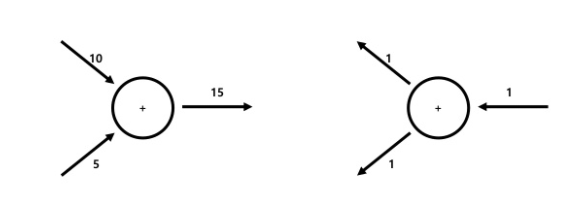

In [ ]:
class Add(Function):
    def forward(self, x0, x1):
        y = x0 + x1
        return y
    
    def backward(self, dy):
        return dy, dy # 두 개의 값을 반환

# 여기서 두 개의 값을 반환할려면 역전파의 핵심 구현을 변경해야합니다.

## Variable 클래스의 Backward 메서드를 수정

In [ ]:
class Variable:
    def __init__(self, data):
        if data is not None: 
            if not isinstance(data, np.ndarray):
                raise TypeError('{}은(는) 지원하지 않아요. ndarray로 입력하세요.'.format(type(data)))
                
        self.data = data
        self.grad = None
        self.creator = None
        
    def set_creator(self, func):
        self.creator = func
        
    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)
            
        funcs = [self.creator]
        while funcs:
            f = funcs.pop()
            gys = [output.grad for output in f.outputs] # output에 담겨 있는 미분값들을 리스트에 담음
            gxs = f.backward(*gys) # 2.f의 역전파를 호출 > 미분값들을 언팩해서 전달
            if not isinstance(gxs, tuple): # 3.gxs가 튜플이 아니라면 튜플로 변환
                gxs = (gxs,)
            
            for x, gx in zip(f.inputs, gxs): # 4. 역전파로 전파되는 미분값을 Variable의 인스턴스 변수 grad에 저장함
                x.grad = gx
                
                if x.creator is not None:
                    funcs.append(x.creator)

## Square 클래스 구현

- 지금까지 Variable과 Function 클래스가 가변 길이 입출력을 지원하도록 개선함

- Square 클래스도 새로운 Variable과 Function 클래스에 맞게 수정

In [ ]:
class Square(Function):
    def forward(self, x):
        y = x ** 2
        return y
    
    def backward(self, gy):
        x = self.inputs[0].data # 수정 전: self.input.data 복수형 inputs로 변경
        gx = 2 * x * gy
        return gx

# 14.같은 변수 반복 사용

- 현재 같은 변수를 반복해서 사용할 경우 의도대로 동작하지 않을 수 있는 문제가 있음

In [ ]:
x = Variable(np.array(3.0))
y = add(x, x)
print('y', y.data)

y.backward()
print('x.grad', x.grad)

y = 6.0

x.grad = 1.0

- y값은 제대로 계산했으나, x에 대한 미분값(x.gard)에서는 1.0이라는 잘못된 결과가 나옴. 제대로 계산했으면 y=x+x=2x이므로, 미분값은 2가 나와야 함


In [ ]:
# - Variable 클래스의 다음 위치에서의 문제 때문에 x.grad가 틀리게 나옴

class Variable:
    def __init__(self, data):
        if data is not None: 
            if not isinstance(data, np.ndarray):
                raise TypeError('{}은(는) 지원하지 않아요. ndarray로 입력하세요.'.format(type(data)))
                
        self.data = data
        self.grad = None
        self.creator = None
        
    def set_creator(self, func):
        self.creator = func
    
    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)
            
        funcs = [self.creator]
        while funcs:
            f.funcs.pop()
            gys = [output.grad for output in outputs]
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = (gxs,)
                
            for x in zip(f.inputs, gxs):
                x.grad = gx ### 이 부분에서 발생하는 문제!
                
                if x.grad is not None:
                    funcs.append(x.creator)

# 현재 구현에서는 출력 쪽에서 전해지는 미분값을 그대로 대입함
# 따라서 같은 변수를 반복해서 사용하면 전파되는 미분값이 덮어써짐!

In [ ]:
# 수정

class Variable:
    def __init__(self, data):
        if data is not None: 
            if not isinstance(data, np.ndarray):
                raise TypeError('{}은(는) 지원하지 않아요. ndarray로 입력하세요.'.format(type(data)))
                
        self.data = data
        self.grad = None
        self.creator = None
        
    def set_creator(self, func):
        self.creator = func
        
    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)
        
        funcs = [self.creator]
        while funcs:
            f = funcs.pop()
            gys = [output.grad for output in f.outputs]
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = (gxs,)
                
            for x, gx in zip(f.inputs, gxs):
                if x.grad is None: # 해당 부분 추가 처음에만 값을 추가하고
                    x.grad = gx
                else:
                    x.grad = x.grad + gx # 나머지 경우에는 다 더함
                
                if x.creator is not None:
                    funcs.append(x.creator)




이제 이전 연산을 하면 기울기값이 2.0으로 올바르게 나옴!

하지만 바로 다른 계산에 사용할 경우 값이 초기화가 되지않아 이전 기울기에 값이 그냥 더해짐!

In [ ]:
class Variable:
    def __init__(self, data):
        if data is not None: 
            if not isinstance(data, np.ndarray):
                raise TypeError('{}은(는) 지원하지 않아요. ndarray로 입력하세요.'.format(type(data)))
                
        self.data = data
        self.grad = None
        self.creator = None
        
    def set_creator(self, func):
        self.creator = func
        
    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)
        
        funcs = [self.creator]
        while funcs:
            f = funcs.pop()
            gys = [output.grad for output in f.outputs]
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = (gxs,)
                
            for x, gx in zip(f.inputs, gxs):
                if x.grad is None:
                    x.grad = gx
                else:
                    x.grad = x.grad + gx
                
                if x.creator is not None:
                    funcs.append(x.creator)
                    
    def cleargrad(self): # 초기화 기능
        self.grad = None

# 새로운 계산을 할 때 x.cleargard를 사용하면 됨!

# 15.복잡한 계산 그래프(이론편)

현재 우리가 작성한 코드로는 복잡한 계산 그래프의 역전파가 불가능합니다.

1. 현재 가능한 역전파 그래프 (예시)

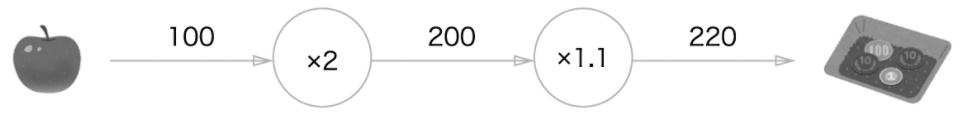

2. 복잡한 계산 그래프 예시

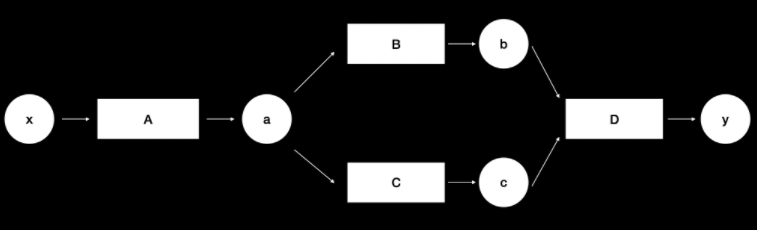

같은 변수를 반복해서 사용하거나 여러 변수를 입력받는 함수를 사용하는 계산을 할 수 있지만 , 미분이 불가능합니다.

이 계산 그래프를 미분하면 a 부분에서 B와 C의 미분값을 모두 받은 후 A에게 전파를 해야하는데

- 함수 관점에서 D, B, C, A 순으로 전파가 일어나야함!

현재 우리의 코드는

1. a에 C 미분값이 들어옴 > A 전파

2. a에 B 미분값이 들어옴 > A에게 한번 더 전파

- D, C, A, B, A 순으로 전파가 일어남!

In [ ]:
# 원인, 함수에 우선순위가 있는데 pop은 간순히 마지막 원소만 뽑아줌!

class Variable:
    ...
    def backward(self):
        ...
        while funcs:
           ...
           # funcs의 마지막 element를 pop
           f = funcs.pop()
           ...
           
               if x.creator is not None:
                   # funcs에 creator function 추가
                   funcs.append(x.creator) 

순전파를 할떄 함수가 변수를 만드는 과정을 보고 이 관계를 기준으로 세대를 기록하면 문제 해결가능

세대가 우선순위 역할을 해줌